In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def read_data(filename1):
    '''
    This function reads the filename and puts the data into a dataframe.
    
    input: the name of the file
    output: a dataframe    
    '''
    
    df = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")
    return df

In [4]:
df = read_data('Comparisons - one sheet_06_26')

In [5]:
df.head()

,City,BASICS,Type,Link,Legal Means,Year Enacted_up,Date Enacted,Sunlight Foundation Partnership?,Prior Versions?,Population (ACS 2012; US Census 2012 est for counties),...,How to Implement Policy,24. Create or appoint oversight authority,25. Create guidance or other binding regulations for implementation,26. Incorporate public perspectives into policy implementation,27. Set appropriately ambitious timelines for implementation,28. Create processes to ensure data quality,29. Ensure sufficient funding for implementation,30. Create or explore potential partnerships,31. Mandate future review for potential changes to this policy,adoption rate of a version of policy(total score/31*2)
0,"Washington, D.C.",NaN,US City,http://www.scribd.com/fullscreen/26442622?acce...,Administrative Memo,2006.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,"Washington, D.C.",NaN,US City,http://www.dcregs.dc.gov/Gateway/NoticeHome.as...,Mayoral Memo,2011.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,2,2,NaN,n/a,2,NaN,0.10
2,"Washington, D.C.",NaN,US City,http://dc.gov/page/transparency-open-governmen...,Executive Directive,2014.0,7/21/2014,0,2006 Admin Memo: http://www.scribd.com/fullscr...,"632,323",...,NaN,"""1) The Chief Technology Officer shall designa...",n/a,"""7) A mechanism for the public to submit feedb...","""Within 120 days of the date of this Order, th...",n/a,n/a,"""The Open Government Report will describe step...","""Open Government Report. To institutionalize a...",0.58
3,"Portland, OR",NaN,US City,http://www.portlandonline.com/shared/cfm/image...,Legislation,2009.0,09/30/2009,1,n/a,"603,650",...,NaN,n/a,n/a,n/a,n/a,n/a,n/a,"""Work with Travel Portland and regional partne...",n/a,0.26
4,"Memphis, TN",NaN,US City,http://www.memphistn.gov/portals/0/pdf_forms/M...,Executive Order,2009.0,10/17/2009,1,n/a,"655,141",...,NaN,n/a,n/a,"""The Office of the Mayor shall provide opportu...",The Order is effective within 7 days; some dat...,n/a,n/a,n/a,n/a,0.26


In [6]:
df[df["Year Enacted_up"].isnull()]

,City,BASICS,Type,Link,Legal Means,Year Enacted_up,Date Enacted,Sunlight Foundation Partnership?,Prior Versions?,Population (ACS 2012; US Census 2012 est for counties),...,How to Implement Policy,24. Create or appoint oversight authority,25. Create guidance or other binding regulations for implementation,26. Incorporate public perspectives into policy implementation,27. Set appropriately ambitious timelines for implementation,28. Create processes to ensure data quality,29. Ensure sufficient funding for implementation,30. Create or explore potential partnerships,31. Mandate future review for potential changes to this policy,adoption rate of a version of policy(total score/31*2)
78,"San Jose, CA",NaN,US City,https://www.sanjoseca.gov/DocumentCenter/View/...,Admin Policy,NaN,5/13/16,0,n/a/,"998,537",...,NaN,Roles and Responsibilities\rTo facilitate the ...,To facilitate the strategic implementation of ...,This was completed through the city's posting ...,The City Manager will issue an annual report t...,Open Data Standards section,n/a,In an effort to maximize the impact of this Po...,Status Updates on Open Data Posting: The City ...,0.76
86,New Orleans,NaN,US City,http://www.nola.gov/mayor/press-releases/2016/...,NaN,NaN,NaN,1,NaN,NaN,...,NaN,The Chief Administrative Office shall issue a ...,The plan for maintaining compliance with the L...,NaN,Any and all other considerations necessary to ...,NaN,NaN,the adoption of a Data Policy improves the pro...,The plan for reporting progress towards the ac...,0.39


# Useful functions

In [7]:
def explore_analysis(column1, column2, option, df):
    '''
    This function returns three types of analysis (descriptive stats, groupby on mean, groupby on count) 
    give two columns of a dataframe.
    
    input:
        column1: the column for which we want statistics on a grouped data
        column2: the column on which grouping is performed
        
    output: 
        a dataframe with desired type of analysis    
    '''
    
    if option == 'describe':
        df_2 = df[column1].describe()
    elif option == 'groupby_mean':
        df_2 = df[column1].groupby(df[column2]).mean().reset_index()
    elif option == 'groupby_median':
        df_2 = df[column1].groupby(df[column2]).median().reset_index()
    elif option == 'groupby_count':
        df_2 = df[column1].groupby(df[column2]).count().reset_index()
    elif option == 'grouby_max':
        df_2 = df[column1].groupby(df[column2]).max().reset_index()
    
    return df_2

In [8]:
#single axis
def seaborn_chart(x_1, y_1, data_1, xlabel_1, ylabel_1, title):
    '''
    This function returns a chart for two columns (x-axis and y-axis)
    '''
    
    sns.set_style("whitegrid")
    ax = plt.subplots(figsize=(20, 6))
    ax = sns.barplot(x=x_1, y=y_1, data=data_1)
    ax.set(xlabel=xlabel_1)
    ax.set(ylabel=ylabel_1)    
    sns.plt.title(title)
    sns.plt.show()

In [9]:
#double axes
def seaborn_chart2(x_1, y_1, data_1, xlabel_1, ylabel_1, title, x_2, y_2, data_2):
    '''

    '''
    
    sns.set_style("whitegrid")
    ax = plt.subplots(figsize=(23, 8))
    ax = sns.barplot(x=x_1, y=y_1, data=data_1)
    ax.set(xlabel=xlabel_1)
    ax.set(ylabel=ylabel_1)
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=x_2, y=y_2, data=data_2)
    
    sns.plt.title(title)
    sns.plt.show()

In [10]:
#for categorical data
def seaborn_chart3(x_1, y_1, hue_1, data_1, xlabel_1, ylabel_1, title):
    '''

    '''
    
    sns.set_style("whitegrid")
   
    sns.set(font_scale=2)
    ax = plt.subplots(figsize=(30, 13))
    ax = sns.barplot(x=x_1, y=y_1, hue=hue_1, data=data_1)
    ax.set(xlabel=xlabel_1)
    ax.set(ylabel=ylabel_1)
    sns.plt.title(title)
    sns.plt.show()

# Overall Cities Analysis

In [11]:
all_sunlight_cities = df.groupby(['City', 'Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)'], as_index=False).sum().iloc[:,0:3]

In [12]:
all_sunlight_cities.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,"Amherst, NY",2014.0,0.37
1,"Anchorage, AK",2016.0,0.71
2,"Asheville, NC",2015.0,0.58
3,"Austin, TX",2011.0,0.00
4,"Austin, TX",2013.0,0.52


In [13]:
all_sunlight_cities_filtered = all_sunlight_cities.sort_index(by=['Year Enacted_up'], ascending=[True])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [14]:
all_sunlight_cities_filtered.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
83,"Washington, D.C.",2006.0,0.00
43,"Memphis, TN",2009.0,0.26
57,"Portland, OR",2009.0,0.26
65,"San Francisco, CA",2009.0,0.00
66,"San Francisco, CA",2010.0,0.00


In [15]:
all_cities_year_mean = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted_up", "groupby_mean", all_sunlight_cities_filtered)

In [16]:
all_cities_year_count = explore_analysis("City","Year Enacted_up", "groupby_count", all_sunlight_cities_filtered)

In [17]:
all_cities_year_count

,Year Enacted_up,City
0,2006.0,1
1,2009.0,3
2,2010.0,1
3,2011.0,6
4,2012.0,9
5,2013.0,16
6,2014.0,24
7,2015.0,11
8,2016.0,16
9,2017.0,1


In [18]:
all_cities_year_mean

,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,2006.0,0.000000
1,2009.0,0.173333
2,2010.0,0.000000
3,2011.0,0.125000
4,2012.0,0.287778
5,2013.0,0.358750
6,2014.0,0.356250
7,2015.0,0.438182
8,2016.0,0.482500
9,2017.0,0.810000


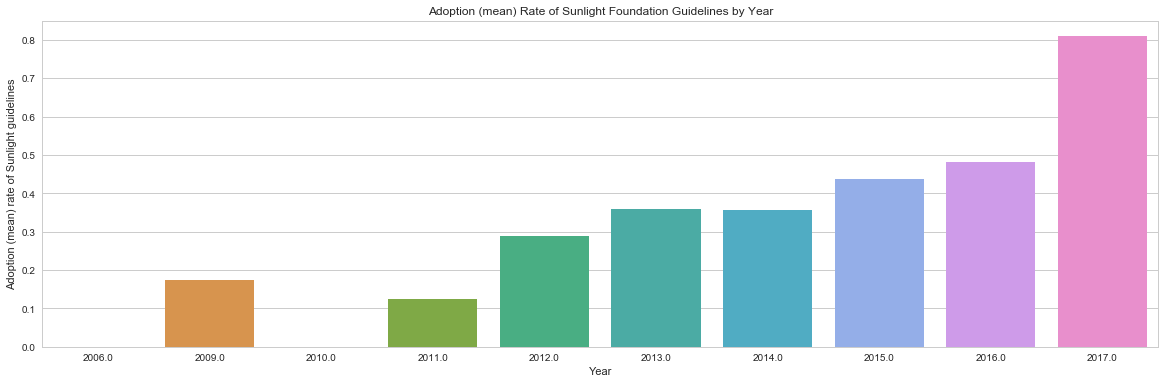

In [19]:
#visual
visual_1 = seaborn_chart('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_mean, 'Year', 'Adoption (mean) rate of Sunlight guidelines', 'Adoption (mean) Rate of Sunlight Foundation Guidelines by Year')

#median

In [20]:
all_cities_year_median = explore_analysis("adoption rate of a version of policy(total score/31*2)","Year Enacted_up", "groupby_median", all_sunlight_cities_filtered)

In [21]:
all_cities_year_median

,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
0,2006.0,0.000
1,2009.0,0.260
2,2010.0,0.000
3,2011.0,0.125
4,2012.0,0.370
5,2013.0,0.360
6,2014.0,0.370
7,2015.0,0.500
8,2016.0,0.520
9,2017.0,0.810


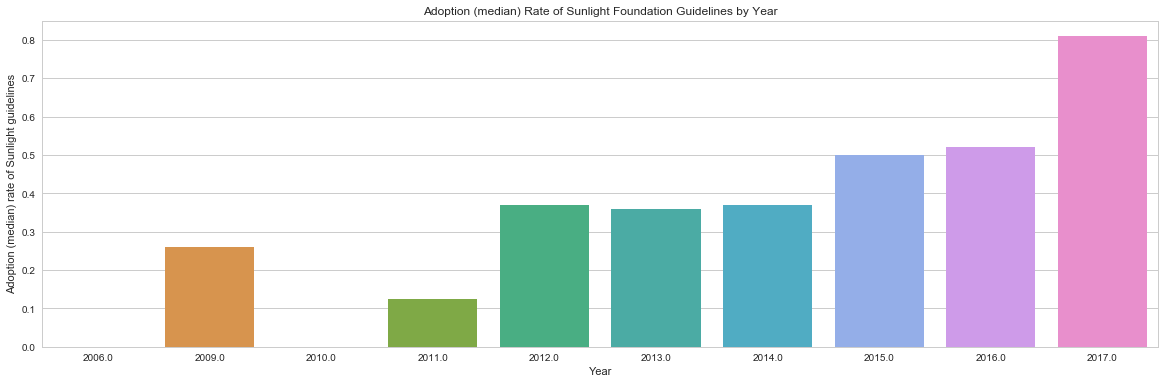

In [22]:
#visual
visual_1_median = seaborn_chart('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_median, 'Year', 'Adoption (median) rate of Sunlight guidelines', 'Adoption (median) Rate of Sunlight Foundation Guidelines by Year')

## Second analysis - overalying the number of cities for each year in the chart

In [23]:
#merge the two datasets
final = all_cities_year_count.merge(all_cities_year_mean)

In [24]:
final

,Year Enacted_up,City,adoption rate of a version of policy(total score/31*2)
0,2006.0,1,0.000000
1,2009.0,3,0.173333
2,2010.0,1,0.000000
3,2011.0,6,0.125000
4,2012.0,9,0.287778
5,2013.0,16,0.358750
6,2014.0,24,0.356250
7,2015.0,11,0.438182
8,2016.0,16,0.482500
9,2017.0,1,0.810000


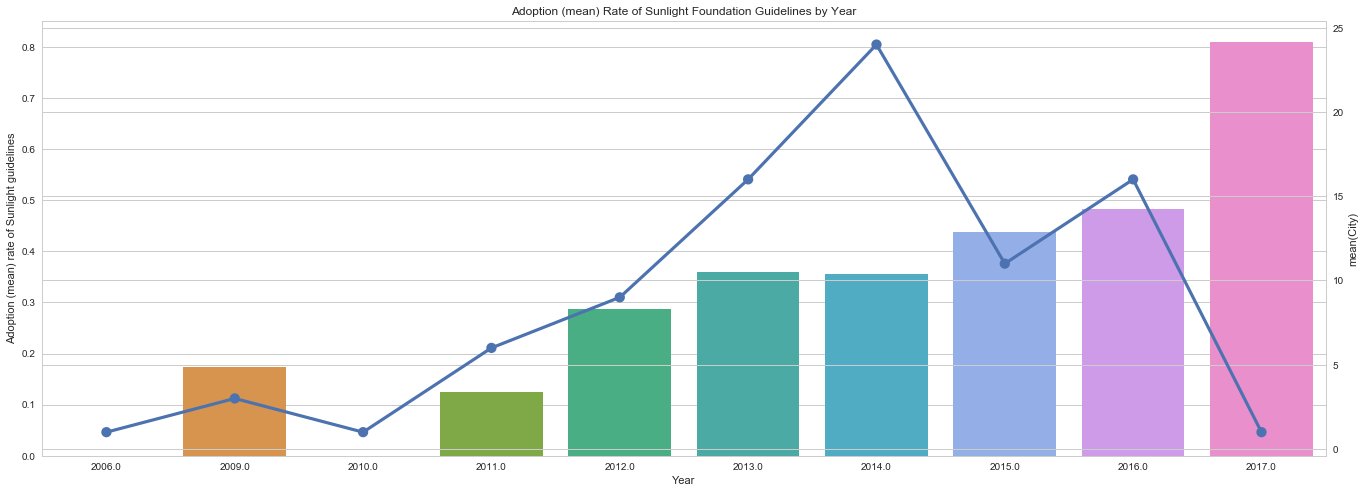

In [25]:
#visual2
visual_2 = seaborn_chart2('Year Enacted_up', 'adoption rate of a version of policy(total score/31*2)', all_cities_year_mean, 'Year', 'Adoption (mean) rate of Sunlight guidelines', 'Adoption (mean) Rate of Sunlight Foundation Guidelines by Year', "Year Enacted_up", "City", all_cities_year_count)

Insights:
- highest number of cities in 2014 but the adoption rate is highest in 2017
- no data on the number of cities for 2017. Do we have that?
- no data on 2010 for the adoption rate.
- Interestingly, the adoption rate of 2009 > adoption rate of 2011. What does that mean?

# Cities that have passed multiple policies

In [46]:
#finding cities with multiple policies
all_cities_duplicate = all_sunlight_cities.duplicated("City", keep=False)

In [47]:
all_cities_duplicate_full = all_sunlight_cities[all_cities_duplicate]

In [48]:
all_cities_duplicate_full.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
3,"Austin, TX",2011.0,0.00
4,"Austin, TX",2013.0,0.52
5,"Baltimore, MD",2011.0,0.00
6,"Baltimore, MD",2016.0,0.00
9,"Cambridge, MA",2014.0,0.00


In [43]:
all_cities_duplicate_full = all_cities_duplicate_full.sort_index(by=['Year Enacted_up'], ascending=[True])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


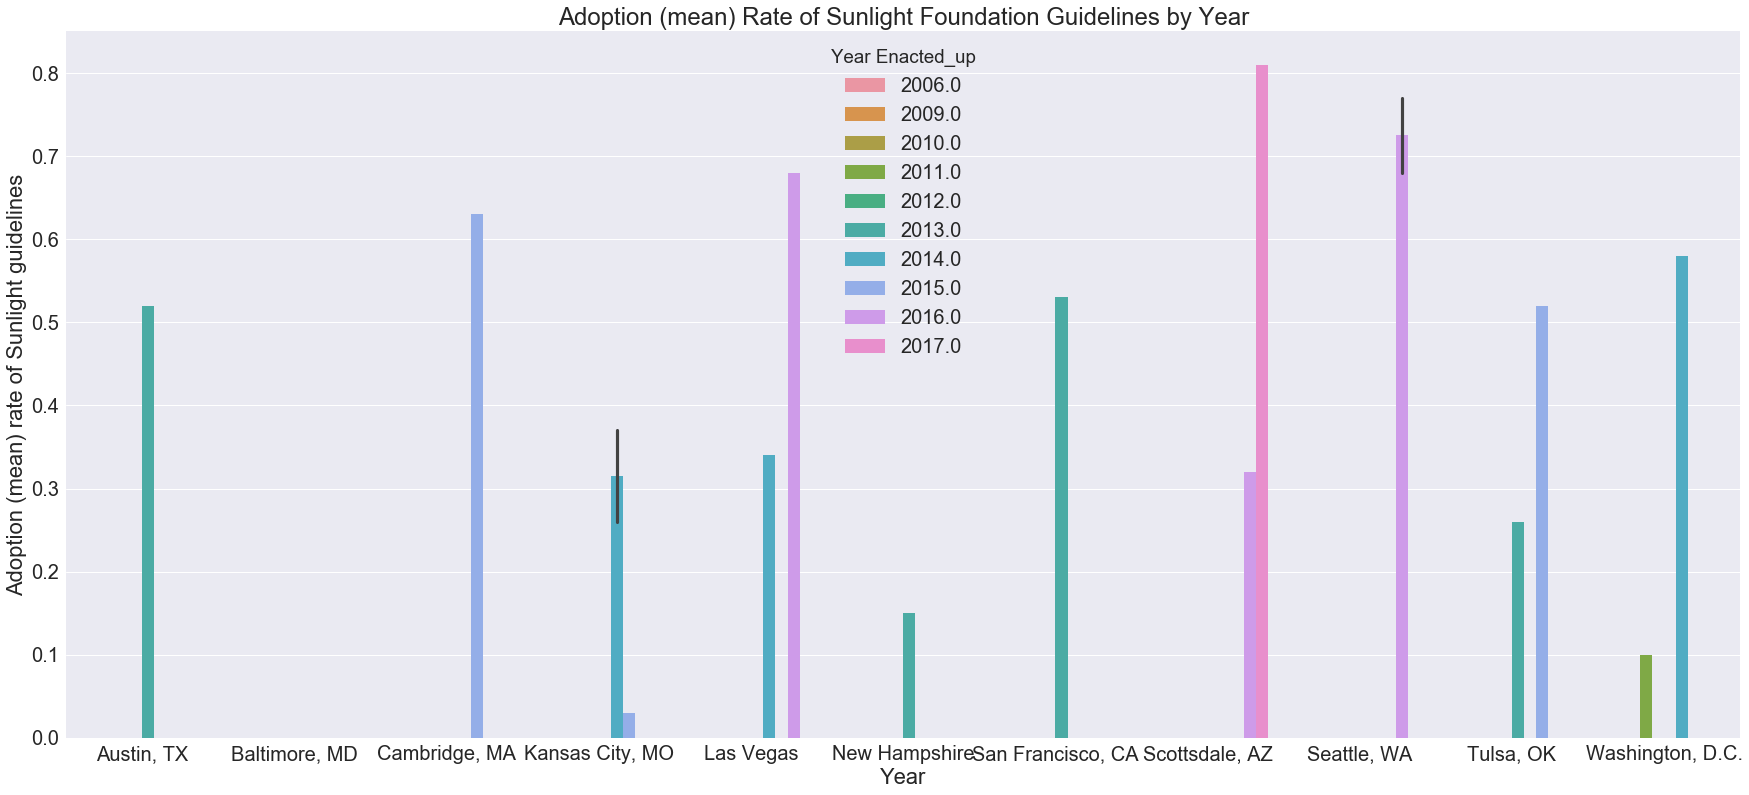

In [49]:
#visual
visual_3 = seaborn_chart3( "City", 'adoption rate of a version of policy(total score/31*2)', "Year Enacted_up", all_cities_duplicate_full, 'Year', 'Adoption (mean) rate of Sunlight guidelines', 'Adoption (mean) Rate of Sunlight Foundation Guidelines by Year')
#sns.barplot(x="adoption rate of a version of policy(total score/31*2)", y="City", hue="Year Enacted_up", data=all_cities_duplicate_full)

In [126]:
all_cities_duplicate_full.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2)
3,"Austin, TX",2011.0,0.00
4,"Austin, TX",2013.0,0.52
5,"Baltimore, MD",2011.0,0.00
6,"Baltimore, MD",2016.0,0.00
9,"Cambridge, MA",2014.0,0.00


In [135]:
m_cities = {}
for city in all_cities_duplicate_full.values:
    
    if city[0] in m_cities:
        m_cities[city[0]].append(city[1])
        m_cities[city[0]].append(city[2])
        
    else:
        
        m_cities[city[0]] = []
        m_cities[city[0]].append(city[1])
        m_cities[city[0]].append(city[2])
        
print(m_cities)

{'Austin, TX': [2011.0, 0.0, 2013.0, 0.52], 'Baltimore, MD': [2011.0, 0.0, 2016.0, 0.0], 'Cambridge, MA': [2014.0, 0.0, 2015.0, 0.63], 'Kansas City, MO': [2014.0, 0.26, 2014.0, 0.37, 2015.0, 0.03], 'Las Vegas': [2014.0, 0.34, 2016.0, 0.68], 'New Hampshire': [2012.0, 0.0, 2013.0, 0.15], 'San Francisco, CA': [2009.0, 0.0, 2010.0, 0.0, 2013.0, 0.53], 'Scottsdale, AZ': [2016.0, 0.32, 2017.0, 0.81], 'Seattle, WA': [2016.0, 0.68, 2016.0, 0.77], 'Tulsa, OK': [2013.0, 0.26, 2015.0, 0.52], 'Washington, D.C.': [2006.0, 0.0, 2011.0, 0.1, 2014.0, 0.58]}


In [143]:
k = all_cities_duplicate_full.values.tolist()

In [156]:
for key, values in m_cities.items():
    print(key, values)

Austin, TX [2011.0, 0.0, 2013.0, 0.52]
Baltimore, MD [2011.0, 0.0, 2016.0, 0.0]
Cambridge, MA [2014.0, 0.0, 2015.0, 0.63]
Kansas City, MO [2014.0, 0.26, 2014.0, 0.37, 2015.0, 0.03]
Las Vegas [2014.0, 0.34, 2016.0, 0.68]
New Hampshire [2012.0, 0.0, 2013.0, 0.15]
San Francisco, CA [2009.0, 0.0, 2010.0, 0.0, 2013.0, 0.53]
Scottsdale, AZ [2016.0, 0.32, 2017.0, 0.81]
Seattle, WA [2016.0, 0.68, 2016.0, 0.77]
Tulsa, OK [2013.0, 0.26, 2015.0, 0.52]
Washington, D.C. [2006.0, 0.0, 2011.0, 0.1, 2014.0, 0.58]


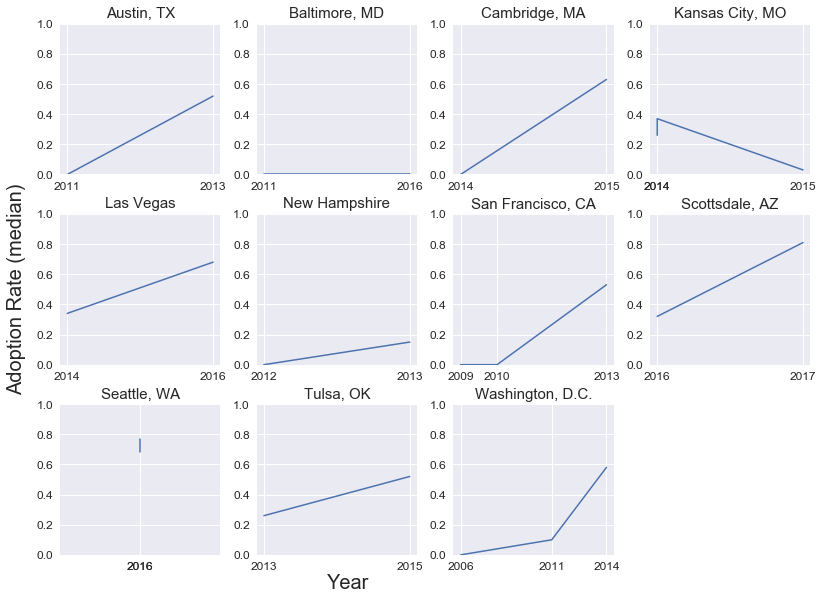

In [289]:
fig = plt.figure(figsize = (11,8))
fig.text(0.4, -0.02, 'Year', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Adoption Rate (median)', va='center', rotation='vertical', fontsize=20)

font = {'weight' : 'medium', 'size'   : 5}
plt.rc('font', **font)
plt.subplots_adjust(hspace=.005)

rows = 3
cols = 4
n = 1

for city, values in m_cities.items():
    plt.subplot(rows, cols, n)
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)

    plt.title(city, fontsize=15)
    x=[]
    y=[]
    
    for i in range(len(values)):
        if i % 2 != 0:
            y.append(values[i])
        else:
            x.append(values[i])
    axes = plt.gca()
    axes.set_ylim([0,1])
            
    #plt.axis([2010, 2017, 0, 1])
    plt.xticks(x)
    #plt.yticks(xrange(10), (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
    
    plt.plot(x, y, linewidth=1.5)
    n += 1
    
    #plt.xlabel('Year', fontsize=15)
    #plt.ylabel('Number of policies', fontsize=15)
plt.tight_layout()
#plt.show()

plt.savefig("outfile-analysis-graph2.jpg", format='jpg')


# State vs. City wide Analysis

In [34]:
all_sunlight_cities["City"] = all_sunlight_cities["City"].astype(str)

In [35]:
all_sunlight_cities.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2),State
0,"Amherst, NY",2014.0,0.37,NY
1,"Anchorage, AK",2016.0,0.71,AK
2,"Asheville, NC",2015.0,0.58,NC
3,"Austin, TX",2011.0,0.00,TX
4,"Austin, TX",2013.0,0.52,TX


In [116]:
def extracting_states(df):
    all_states = []
    for city in df["City"]:
        if "," in city:
            if "D.C." in city:
                state = city[-4:]
            else:
                state = city.rstrip()[-2:]
        else:
            state = city

        all_states.append(state)
    df["State"] = all_states

In [117]:
extracting_states(all_sunlight_cities)

In [119]:
all_sunlight_cities.head()

,City,Year Enacted_up,adoption rate of a version of policy(total score/31*2),State
0,"Amherst, NY",2014.0,0.37,NY
1,"Anchorage, AK",2016.0,0.71,AK
2,"Asheville, NC",2015.0,0.58,NC
3,"Austin, TX",2011.0,0.00,TX
4,"Austin, TX",2013.0,0.52,TX


In [39]:
all_cities_state_count = explore_analysis("City","State", "groupby_count", all_sunlight_cities)
all_cities_state_count.sort_values("City", ascending = False, inplace = True)

In [41]:
all_cities_state_count.head()

,State,City
3,CA,11
20,MO,6
36,TX,5
25,NY,4
17,MD,4


In [42]:
all_states_mean = explore_analysis("adoption rate of a version of policy(total score/31*2)","State", "groupby_mean", all_sunlight_cities)
#all_cities_state_mean.sort_values("City", ascending=False, inplace=True)

In [43]:
all_states_mean.head()

,State,adoption rate of a version of policy(total score/31*2)
0,AK,0.710000
1,AR,0.320000
2,AZ,0.613333
3,CA,0.352727
4,CT,0.350000


In [44]:
all_cities_mean = all_sunlight_cities.groupby(['State','City'])['adoption rate of a version of policy(total score/31*2)'].mean().reset_index()

In [67]:
all_cities_mean.head()

,State,City,adoption rate of a version of policy(total score/31*2)
0,AK,"Anchorage, AK",0.710
1,AR,"Little Rock, AR",0.320
2,AZ,"Mesa, AZ",0.710
3,AZ,"Scottsdale, AZ",0.565
4,CA,"Los Angeles, CA",0.230


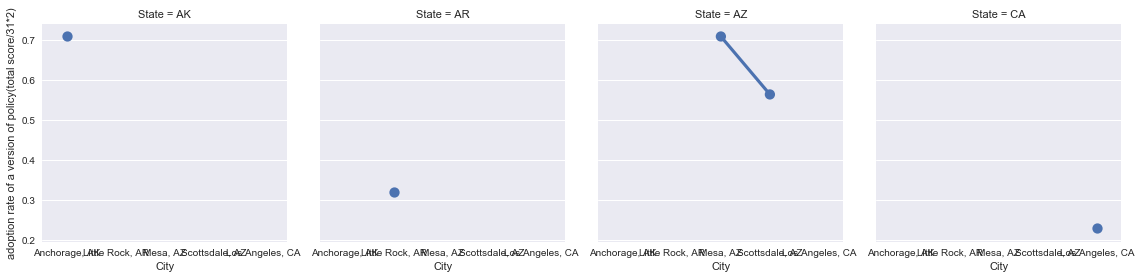

In [66]:
sns.set(font_scale=1)
sns.factorplot(x="City", y="adoption rate of a version of policy(total score/31*2)", col="State", sharex=False, data=all_cities_mean.head(), gridspec_kws={"width_ratios": [5, 3, 3]})
